## Cat and Dog Image Classification using SVM


### Abstract
This project develops a Support Vector Machine (SVM) model for classifying images of cats and dogs. Despite preprocessing and hyperparameter optimization, the model exhibits overfitting, limiting its ability to generalize to new data. Additionally, the project encounters significant computational challenges due to the high-dimensional nature of image data. Future work will involve transitioning to a Convolutional Neural Network (CNN) to better handle the overfitting and computational demands.

### Import Libraries

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

**Setting up parameters**

In [2]:
TRAIN_DIR = 'train'
IMAGE_SIZE = (64, 64)
SAMPLE_SIZE = 10000

### Utils functions

In [3]:
def load_images_from_folder(folder, image_size, sample_size):
    """
    Loads and preprocesses sample of images from a specified folder.   
     
    Arguments:
    folder(str) -- The path to the folder containing the images.
    image_size(tuple) -- The target size to which each image will be resized (width, height).
    sample_size(int) -- The size of the sample
    
    Returns:
    images -- A numpy array containing the preprocessed image data.
    labels -- A numpy array containing the corresponding labels (0 for cat, 1 for dog).
    """
    images = []
    labels = []
    
    for filename in os.listdir(folder)[:sample_size]:
        if filename.endswith('.jpg'):
           
            try:
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)
                img = img.resize(image_size)
                label = 0 if 'cat' in filename else 1
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading the images: {e}")
                
    return np.array(images), np.array(labels)
            

In [4]:
def visualize_images(images, labels, sample_size=20):
    """
    Visualizes a sample of images from the dataset.
    
    Arguments:
    images -- a numpy array of image data.
    labels -- a numpy array of labels
    sample_size -- the size of the sample
    
    """
    
    cols = min(5, sample_size)
    rows = math.ceil(sample_size / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axes = axes.flatten()
    
    for i in range(sample_size):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')
    
    # Hide unused subplots
    for j in range(sample_size, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

### Loading the dataset

In [5]:
X, y = load_images_from_folder(TRAIN_DIR, IMAGE_SIZE, SAMPLE_SIZE)

In [6]:
X.shape

(10000, 64, 64, 3)

In [7]:
y.shape

(10000,)

In [8]:
print(X[0])

[[[158 156 157]
  [160 158 159]
  [161 159 160]
  ...
  [107 102 102]
  [103  98  97]
  [ 97  92  92]]

 [[160 158 159]
  [161 159 160]
  [162 160 161]
  ...
  [162 160 164]
  [160 158 162]
  [154 152 156]]

 [[161 159 160]
  [162 160 161]
  [162 160 161]
  ...
  [152 151 158]
  [150 149 155]
  [146 146 152]]

 ...

 [[119 112 104]
  [126 119 111]
  [128 121 113]
  ...
  [114 113 103]
  [112 111  99]
  [109 109  96]]

 [[123 116 108]
  [127 120 112]
  [127 120 112]
  ...
  [119 115 105]
  [116 113 102]
  [111 111  99]]

 [[125 118 110]
  [128 121 113]
  [128 121 113]
  ...
  [120 116 107]
  [117 113 104]
  [115 111 102]]]


In [9]:
print(y[:10])

[0 0 0 1 1 0 0 1 1 1]


**Visualizing the images**

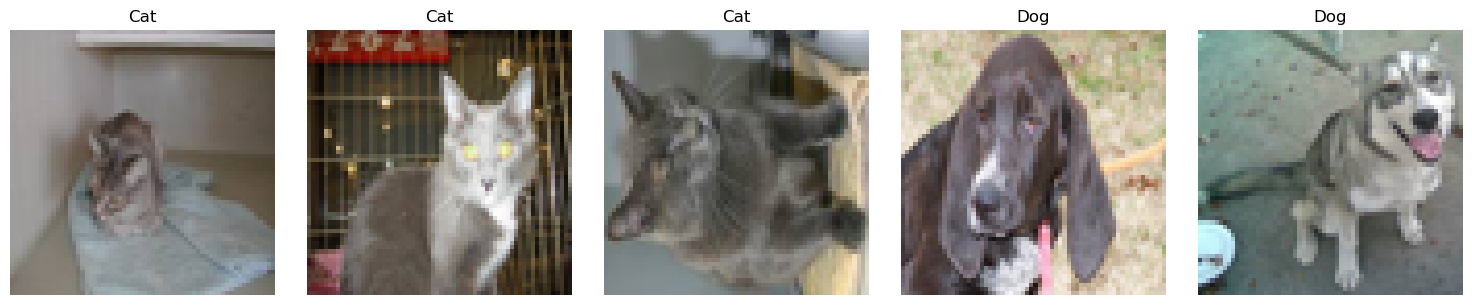

In [10]:
visualize_images(X, y, 5)

### Data Preprocessing

In [11]:
X = X.astype('float32') / 255.0
X = X.reshape(X.shape[0], -1)

In [12]:
# Standardizing the features.
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.5629173 ,  0.6047942 ,  0.7213172 , ..., -0.17870429,
        -0.14656293, -0.1584518 ],
       [-0.5257202 , -0.79791385, -0.8644216 , ..., -1.4478582 ,
        -1.4875826 , -1.3589772 ],
       [ 0.23346123,  0.43126333,  0.6363669 , ...,  1.2527833 ,
         1.3752685 ,  1.3056036 ],
       ...,
       [ 0.3050821 ,  0.17096694,  0.23993215, ...,  0.47063038,
         0.29039863,  0.00259428],
       [-0.26788503, -0.45085204, -0.5246204 , ...,  0.98714644,
         1.0889834 ,  1.3202442 ],
       [-1.4997642 , -1.390811  , -1.2608563 , ...,  0.16072069,
         0.275331  ,  0.5589354 ]], dtype=float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

**Checking the distribution of the target variable:**

In [14]:
_, unique_values = np.unique(y_train, return_counts=True)
unique_values


array([4028, 3972])

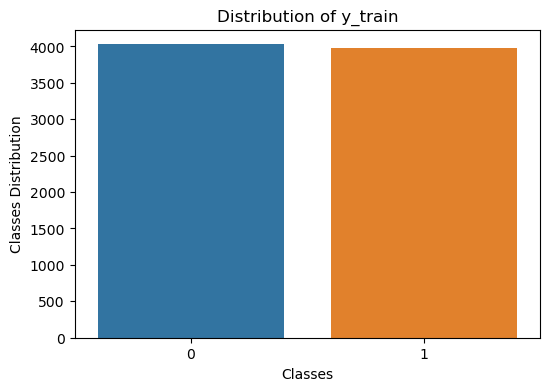

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of y_train')
plt.xlabel('Classes')
plt.ylabel('Classes Distribution')
plt.show()

The training set is balanced.

### Train the SVM model

In [16]:
best_svm = SVC(kernel='rbf', gamma='scale', C=10) 
best_svm.fit(X_train, y_train)


SVC(C=10)

In [17]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 0.01]
# }

In [18]:
# svm = SVC()

# grid_search = GridSearchCV(svm, param_grid, cv=5)

# grid_search.fit(X_train, y_train)

In [19]:
# best_params = grid_search.best_params_
# print("Best parameters found by grid search:", best_params)

# # Train the SVM model with the best parameters
# best_svm = grid_search.best_estimator_

### Model Evaluation

#### 1. Evaluate on the Training Set


In [20]:
y_train_pred = best_svm.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

print("\nClassification Report on Training Set:")
print(classification_report(y_train, y_train_pred))

print("Confusion Matrix on Training Set:")
print(confusion_matrix(y_train, y_train_pred))

Training Accuracy: 0.9995

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4028
           1       1.00      1.00      1.00      3972

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confusion Matrix on Training Set:
[[4025    3]
 [   1 3971]]


#### 2. Evaluate on the Test Set


In [21]:
y_test_pred = best_svm.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.6755

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       999
           1       0.68      0.67      0.67      1001

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000

Confusion Matrix on Test Set:
[[679 320]
 [329 672]]


The model is overfitting the training dataset.